## Importing Required Libraries

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('vgsales.csv')

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.shape

(16598, 11)

### Filling missing values with mode

In [36]:
df.fillna(df['Year'].mode()[0],inplace=True)

In [37]:
df.fillna(df['Publisher'].mode()[0],inplace=True)

In [44]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16598 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16598 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [46]:
df.drop(labels=['Rank'],axis=1,inplace=True)  # Dropping Rank as it is not required

In [48]:
for i in df.columns:
    print('{} has {} no. of unique values'.format(i,df[i].nunique()))

Name has 11493 no. of unique values
Platform has 31 no. of unique values
Year has 39 no. of unique values
Genre has 12 no. of unique values
Publisher has 579 no. of unique values
NA_Sales has 409 no. of unique values
EU_Sales has 305 no. of unique values
JP_Sales has 244 no. of unique values
Other_Sales has 157 no. of unique values
Global_Sales has 623 no. of unique values


## Univariate Analysis

In [302]:
plt.style.use("fivethirtyeight")

Text(0.5, 1.0, 'Name of platform ')

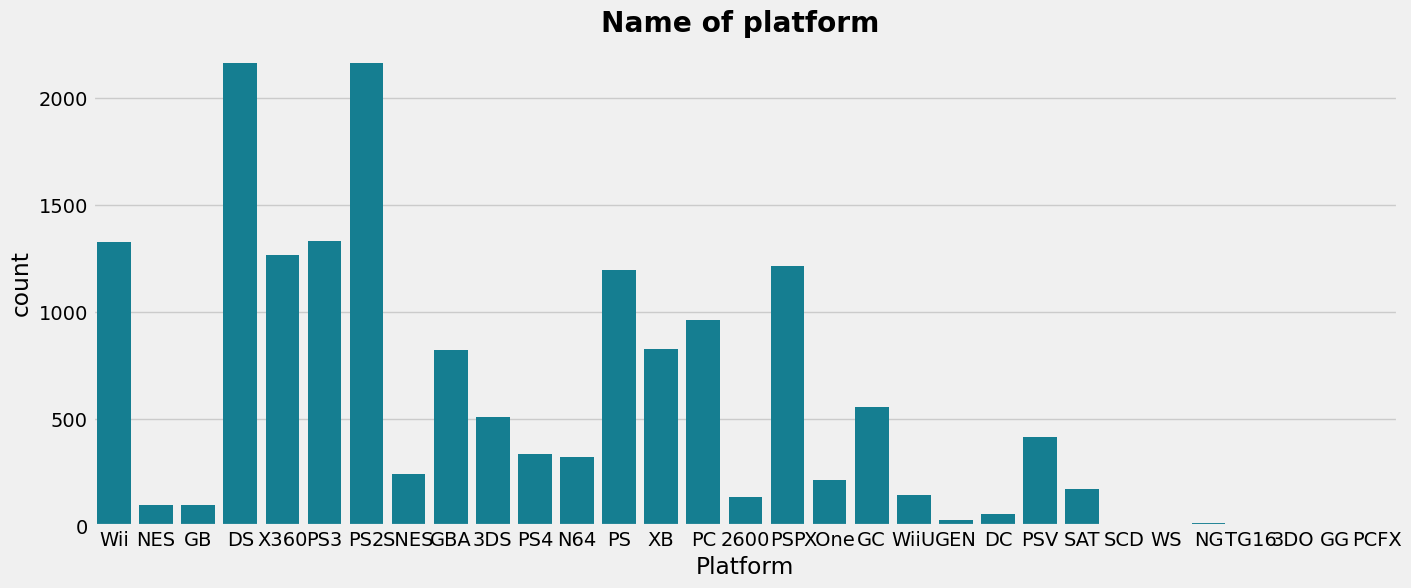

In [119]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['Platform'],color='#008ca6')
plt.title("Name of platform",fontweight="bold")

Text(0.5, 1.0, 'Mostly preferred Genre')

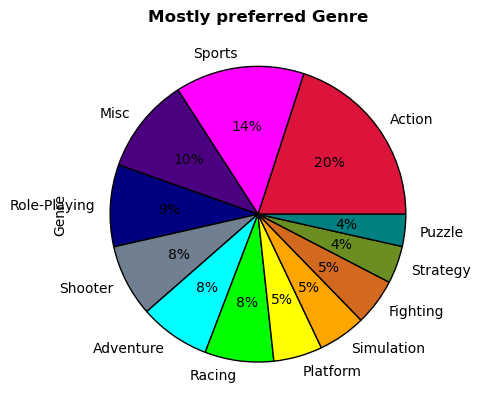

In [239]:
df['Genre'].value_counts().plot(kind='pie',colors = colors, wedgeprops={'edgecolor':'black'},autopct='%1.f%%')
plt.title("Mostly preferred Genre",fontweight="bold")

Text(0.5, 1.0, 'Top 12 Publisher')

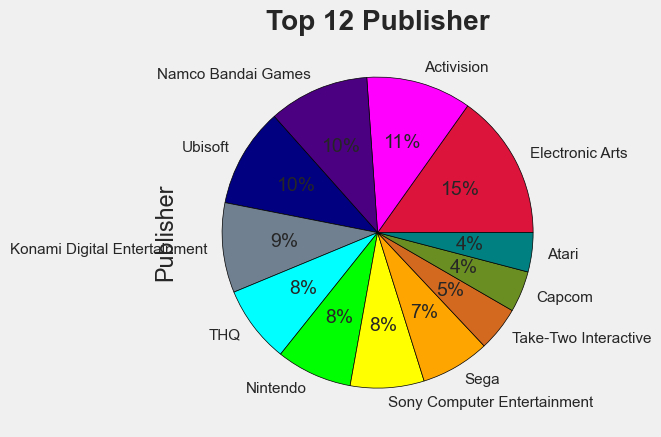

In [325]:
df['Publisher'].value_counts()[:12].plot(kind='pie',colors = colors, wedgeprops={'edgecolor':'black'},autopct='%1.f%%')
plt.title("Top 12 Publisher",fontweight="bold")

### Sale over the years

Text(0.5, 1.0, 'Number of video games sold in an Year')

<Figure size 1200x800 with 0 Axes>

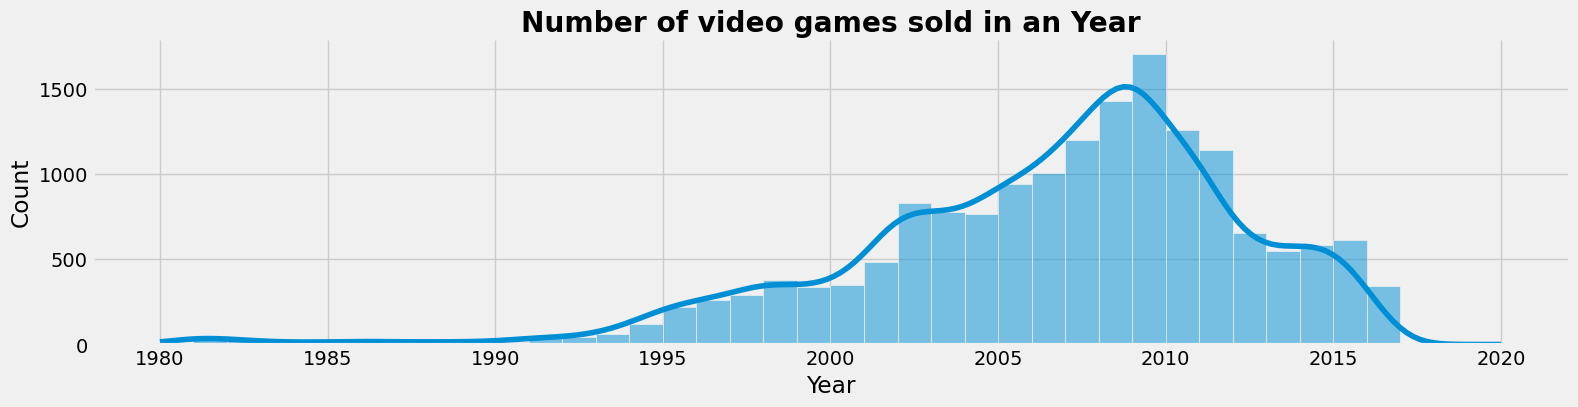

In [114]:
plt.figure(figsize=(12,8))
sns.displot(data=df,x='Year',kde=True,bins=40,aspect=4,height=4,palette='cool')
plt.title("Number of video games sold in an Year",fontweight="bold")

## Most Genre sold in North America

<AxesSubplot:xlabel='Genre', ylabel='NA_Sales'>

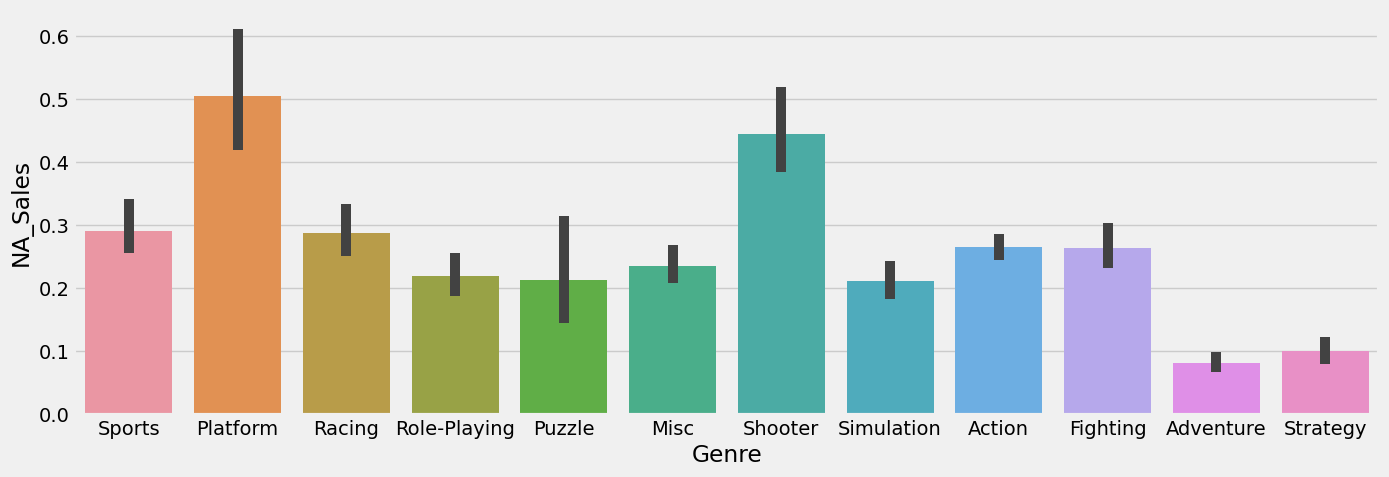

In [221]:
plt.figure(figsize=(15,5))
sns.barplot(df['Genre'],df['NA_Sales'])

## Most Genre sold in Europe

<AxesSubplot:xlabel='Genre', ylabel='EU_Sales'>

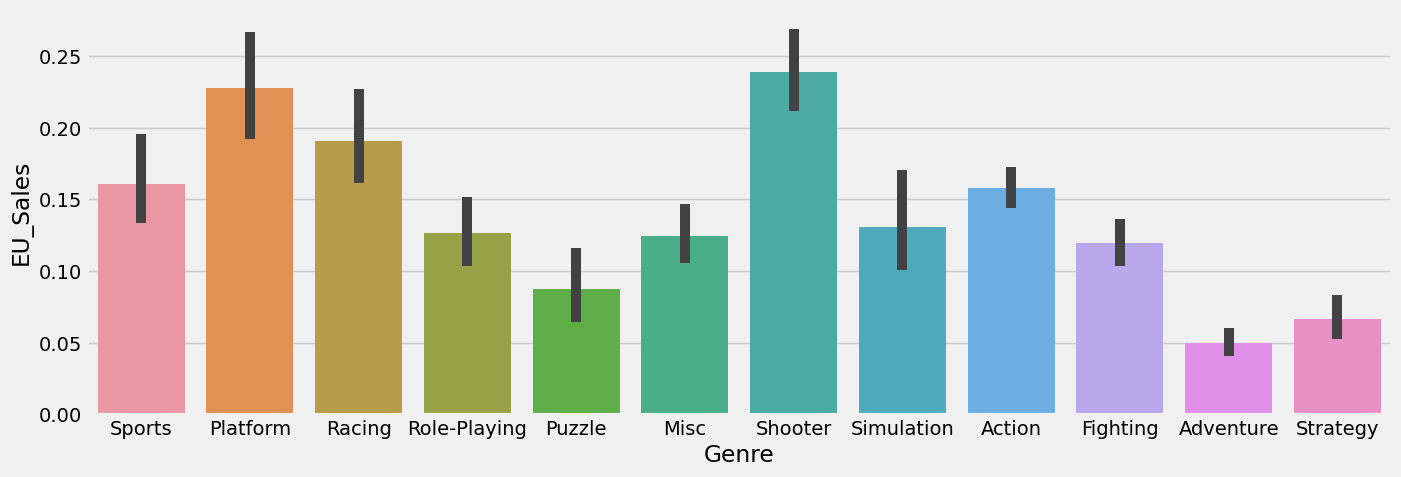

In [222]:
plt.figure(figsize=(15,5))
sns.barplot(df['Genre'],df['EU_Sales'])

## Most Genre sold in Japan

<AxesSubplot:xlabel='Genre', ylabel='JP_Sales'>

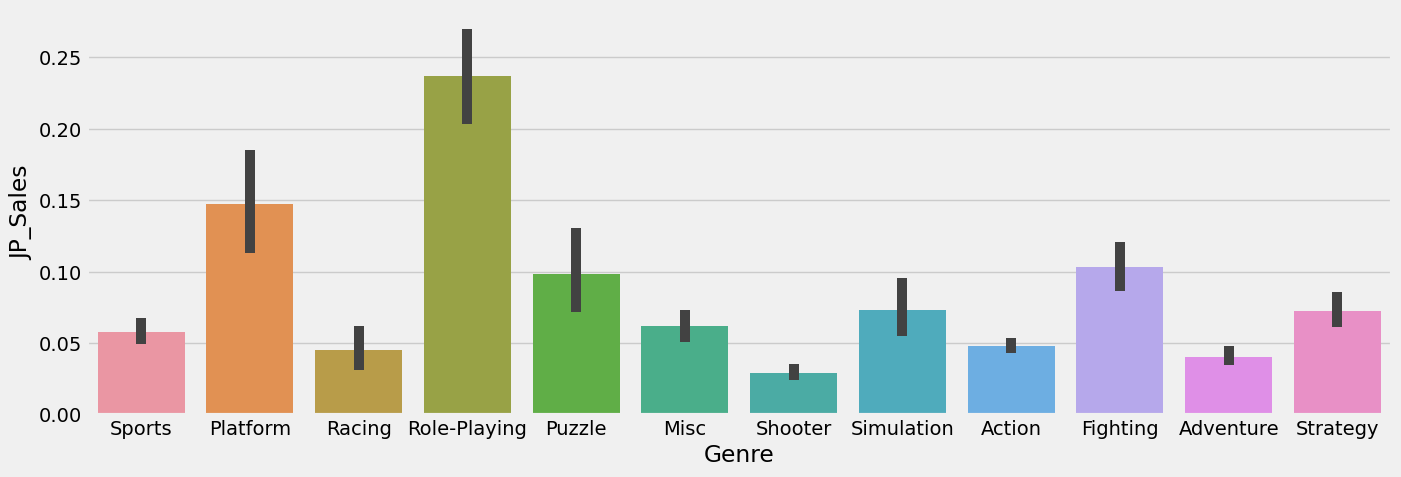

In [223]:
plt.figure(figsize=(15,5))
sns.barplot(df['Genre'],df['JP_Sales'])

## Most genre sold in Other region

<AxesSubplot:xlabel='Genre', ylabel='Other_Sales'>

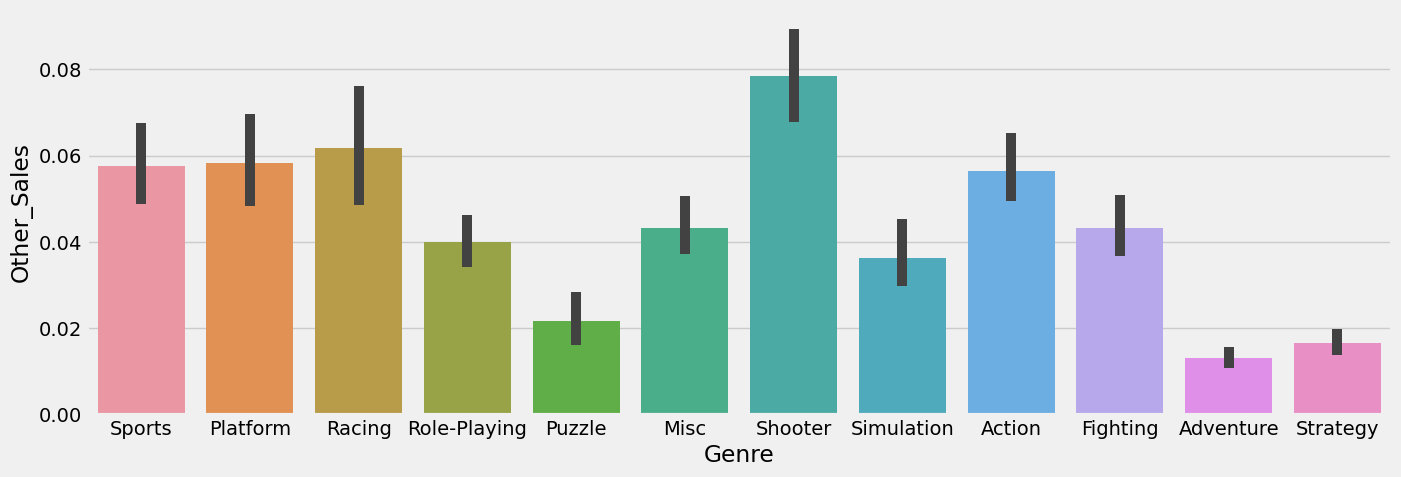

In [224]:
plt.figure(figsize=(15,5))
sns.barplot(df['Genre'],df['Other_Sales'])

## Most genre sold Worldwide 

<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

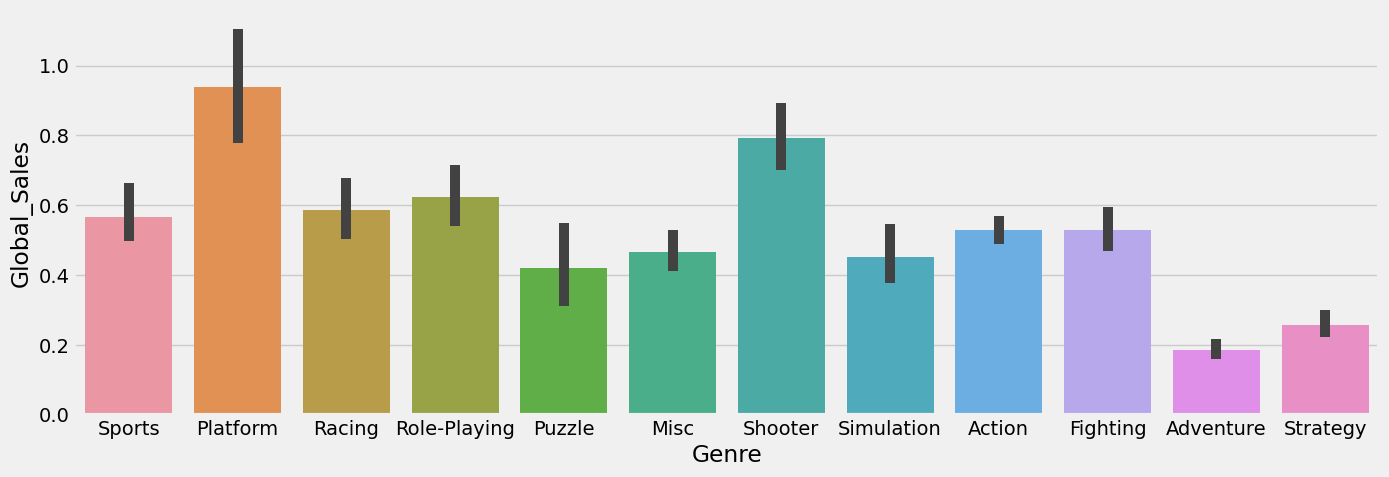

In [225]:
plt.figure(figsize=(15,5))
sns.barplot(df['Genre'],df['Global_Sales'])

# Observation:
        1- PS2 and DS are most used platform followed by Wil, PS3 and X360.
        2- Action and Sports are Most preferred Genre.
        3- Most of the sales occured between 2008 to 2011.
        4- Platform Genre has been preferred most in North America, followed by Shooting Genre.
        5- Shooting and platform games are preferred more in Europe, followed by Racing Genre.
        6- Role-Playing genre is preferred most in Japan almost twice than all others, followed by platform genre.
        7- From Other Regions Shooting genre is preferred more and Sports, Platform and Racing are equally preferred.
        8- If we see Globally, Platform genre has the highest sales i.e. more preferrence followed by Shooting games.
        9- Overall, Adventure genre games are least preferred.
       10- Electronic Arts, Activision, Namco Bandai Games, Ubisoft and Konami Digital Entertainment are top 5 publisher.
       11- Sales from all regions are almost Correlated.

### Correlation between Year, NA_sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales

<AxesSubplot:>

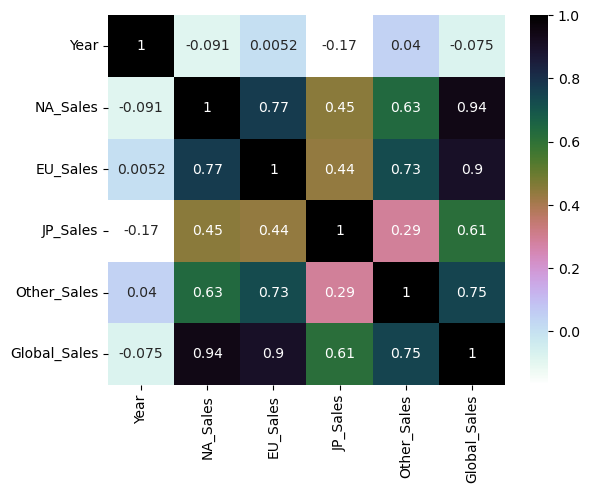

In [243]:
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r')

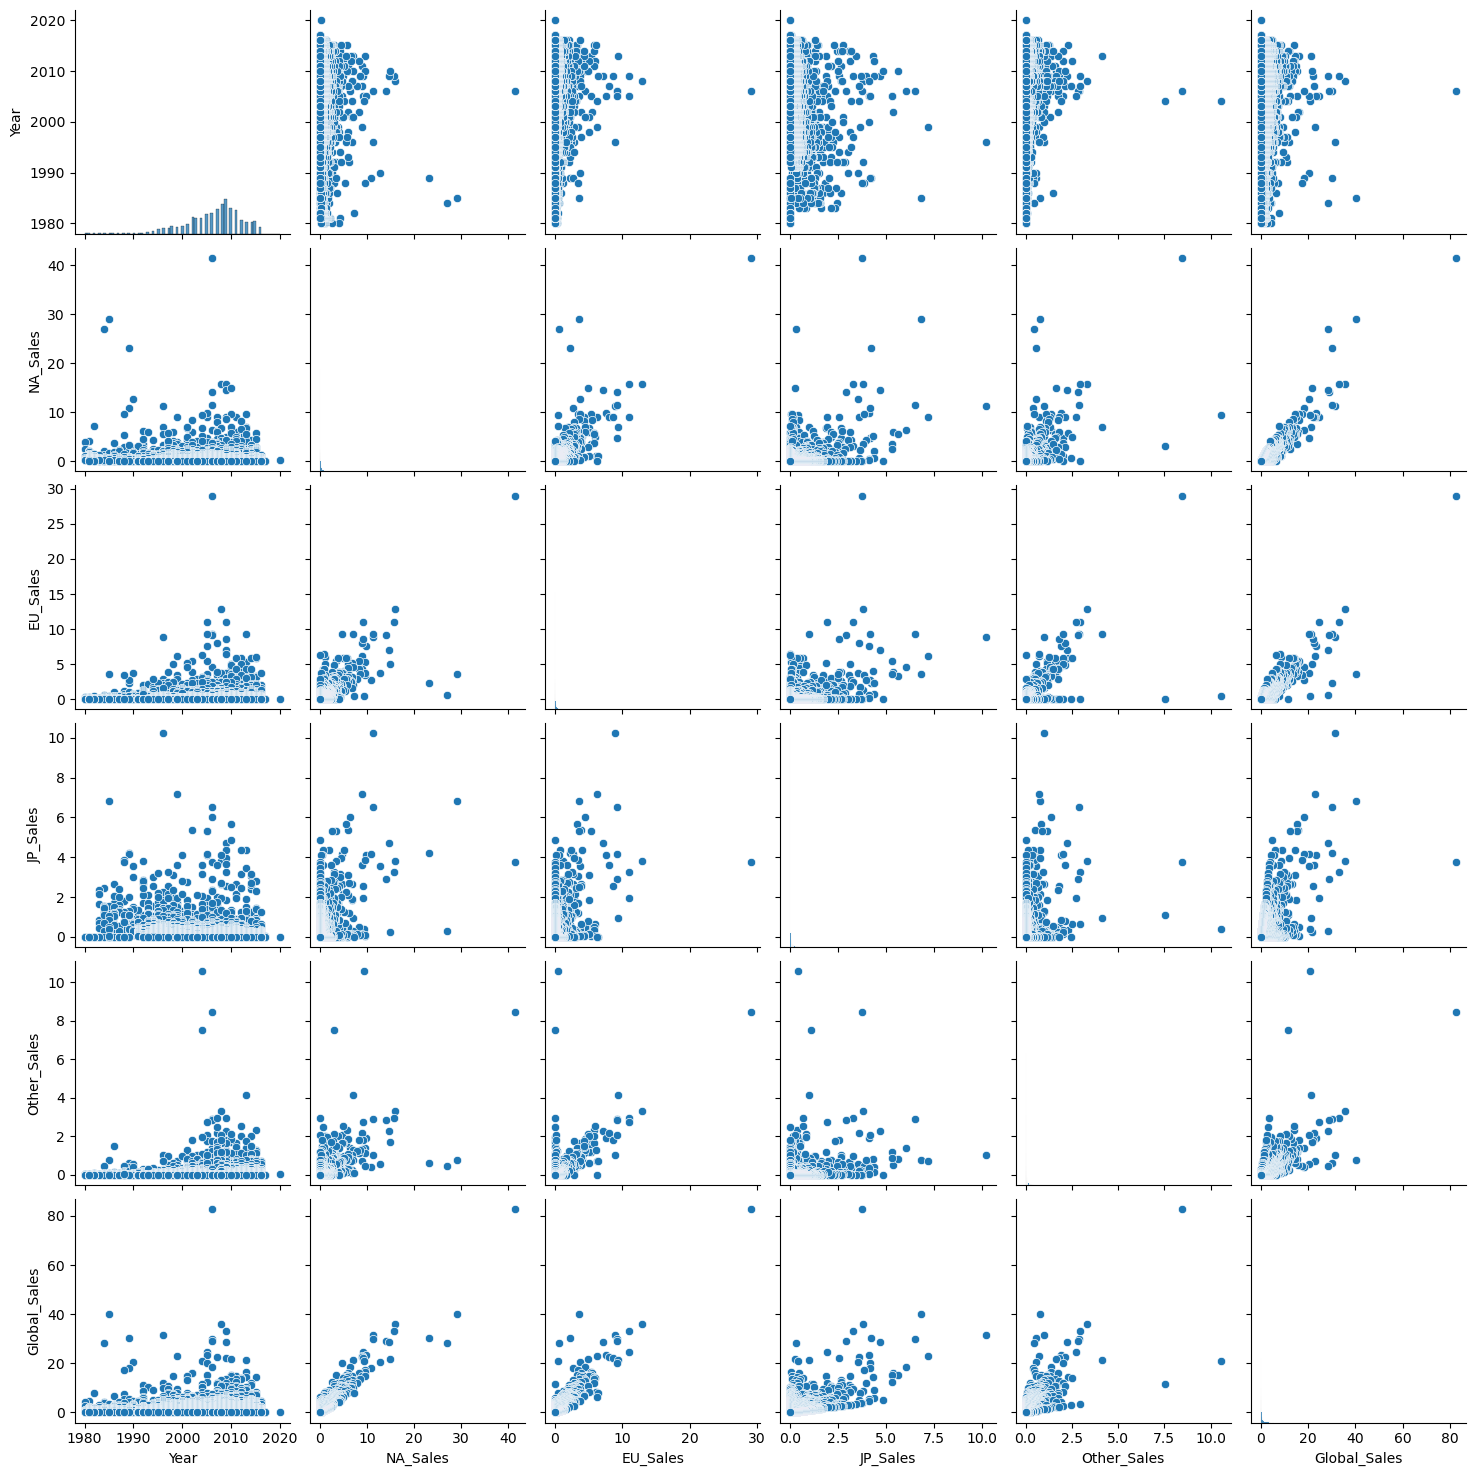

In [248]:
sns.pairplot(df)

### Differenciating numerical and categorical columns and then Checking Outliers 

In [272]:
num_columns = df.select_dtypes(include=['int', 'float']).columns
cat_columns = df.select_dtypes(include=['object','category']).columns

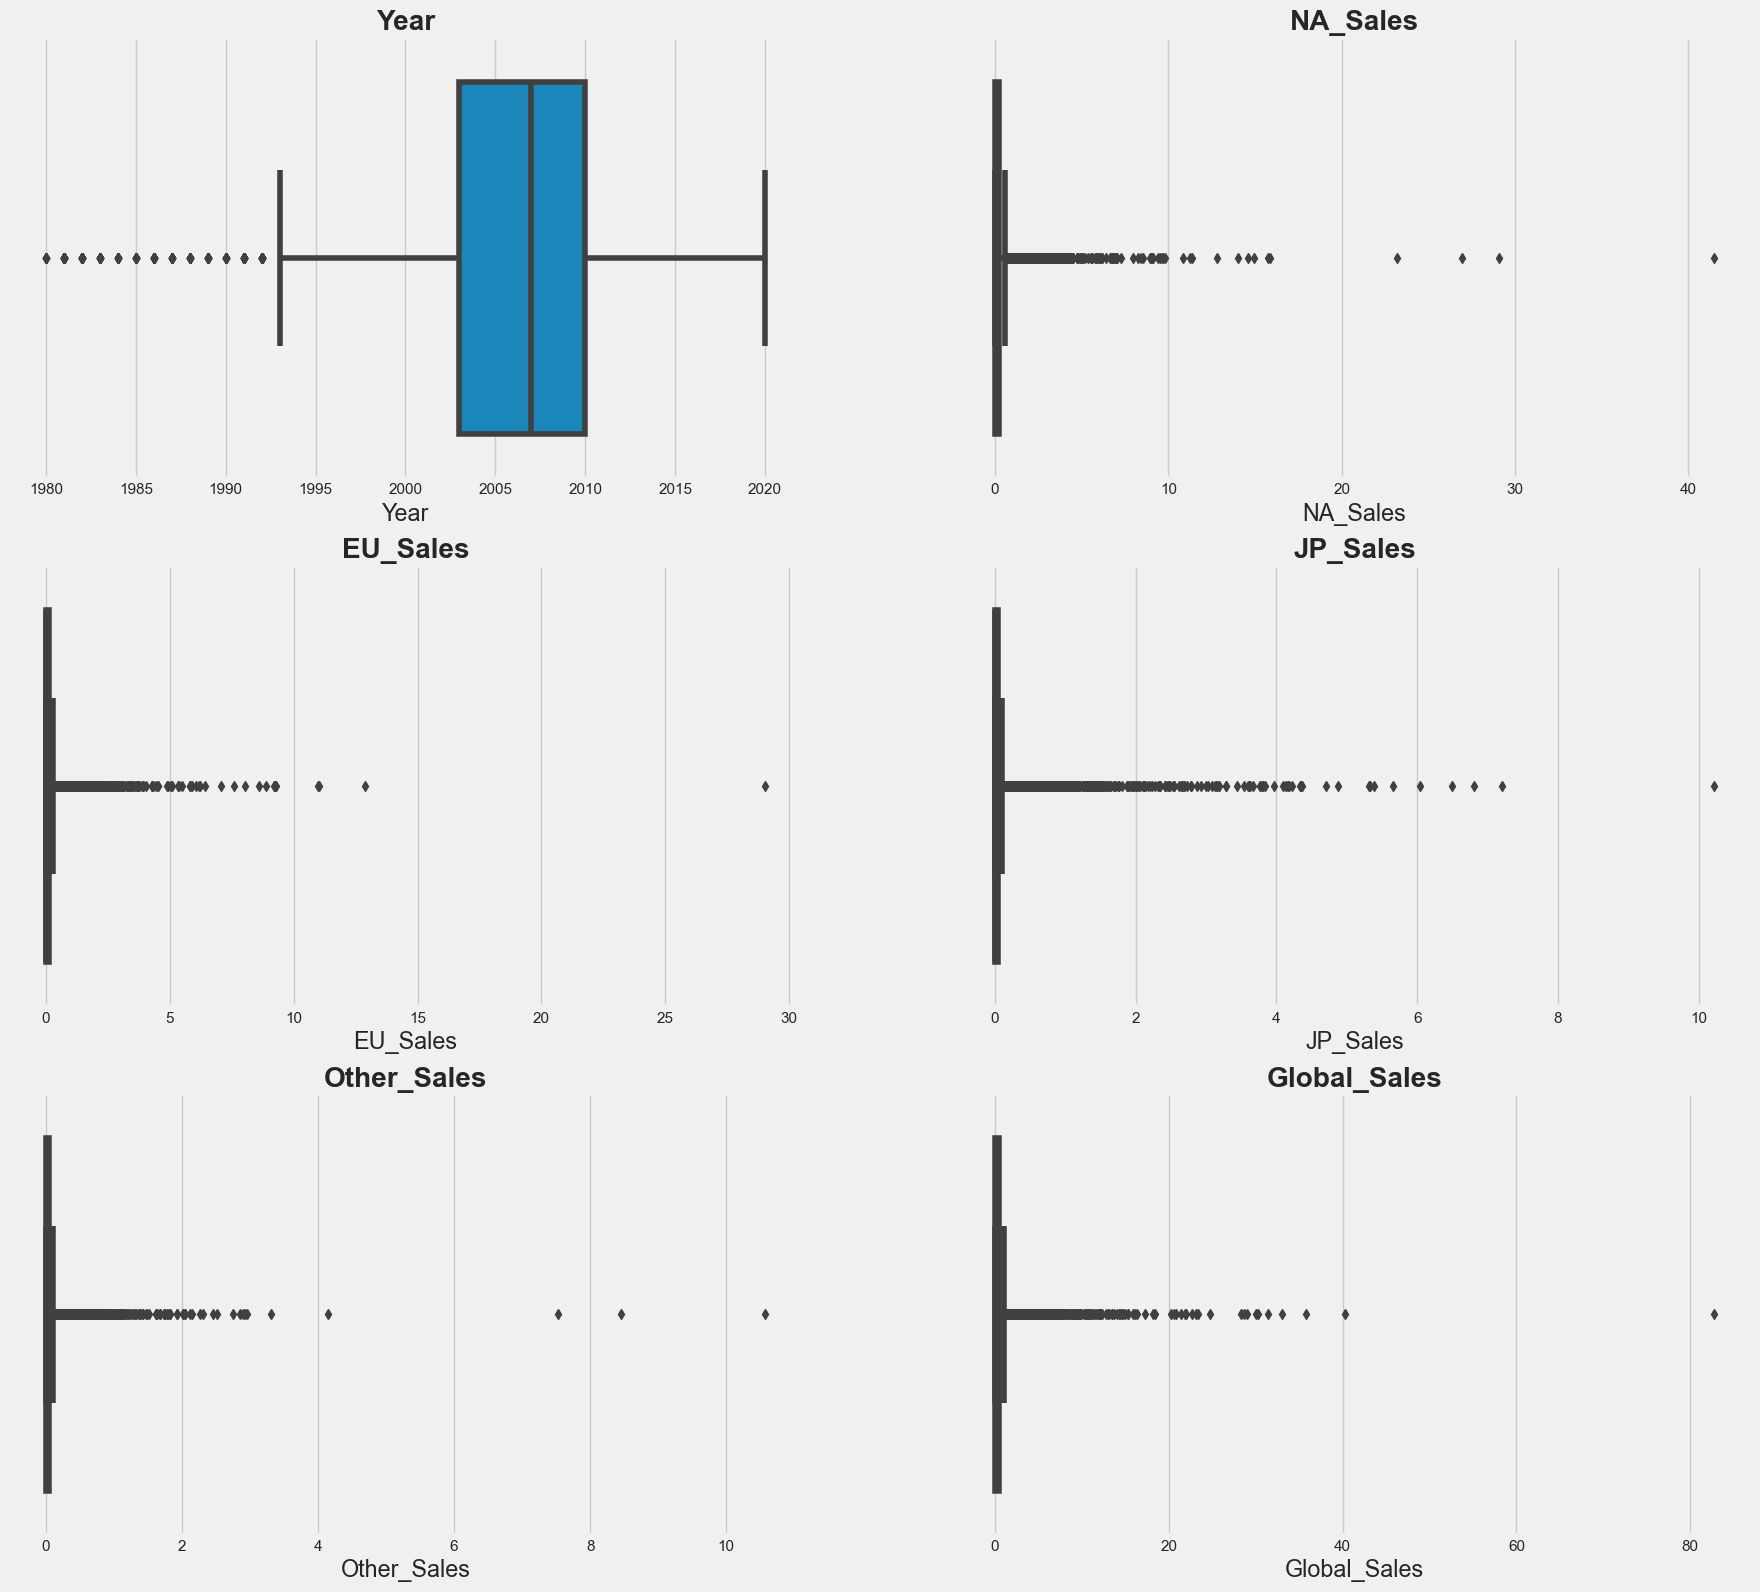

In [307]:
plt.figure(figsize=(20,25))
for i in enumerate(num_columns):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(data=df,x=i[1])
    plt.title("{}".format(i[1]),fontweight="bold")

In [253]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

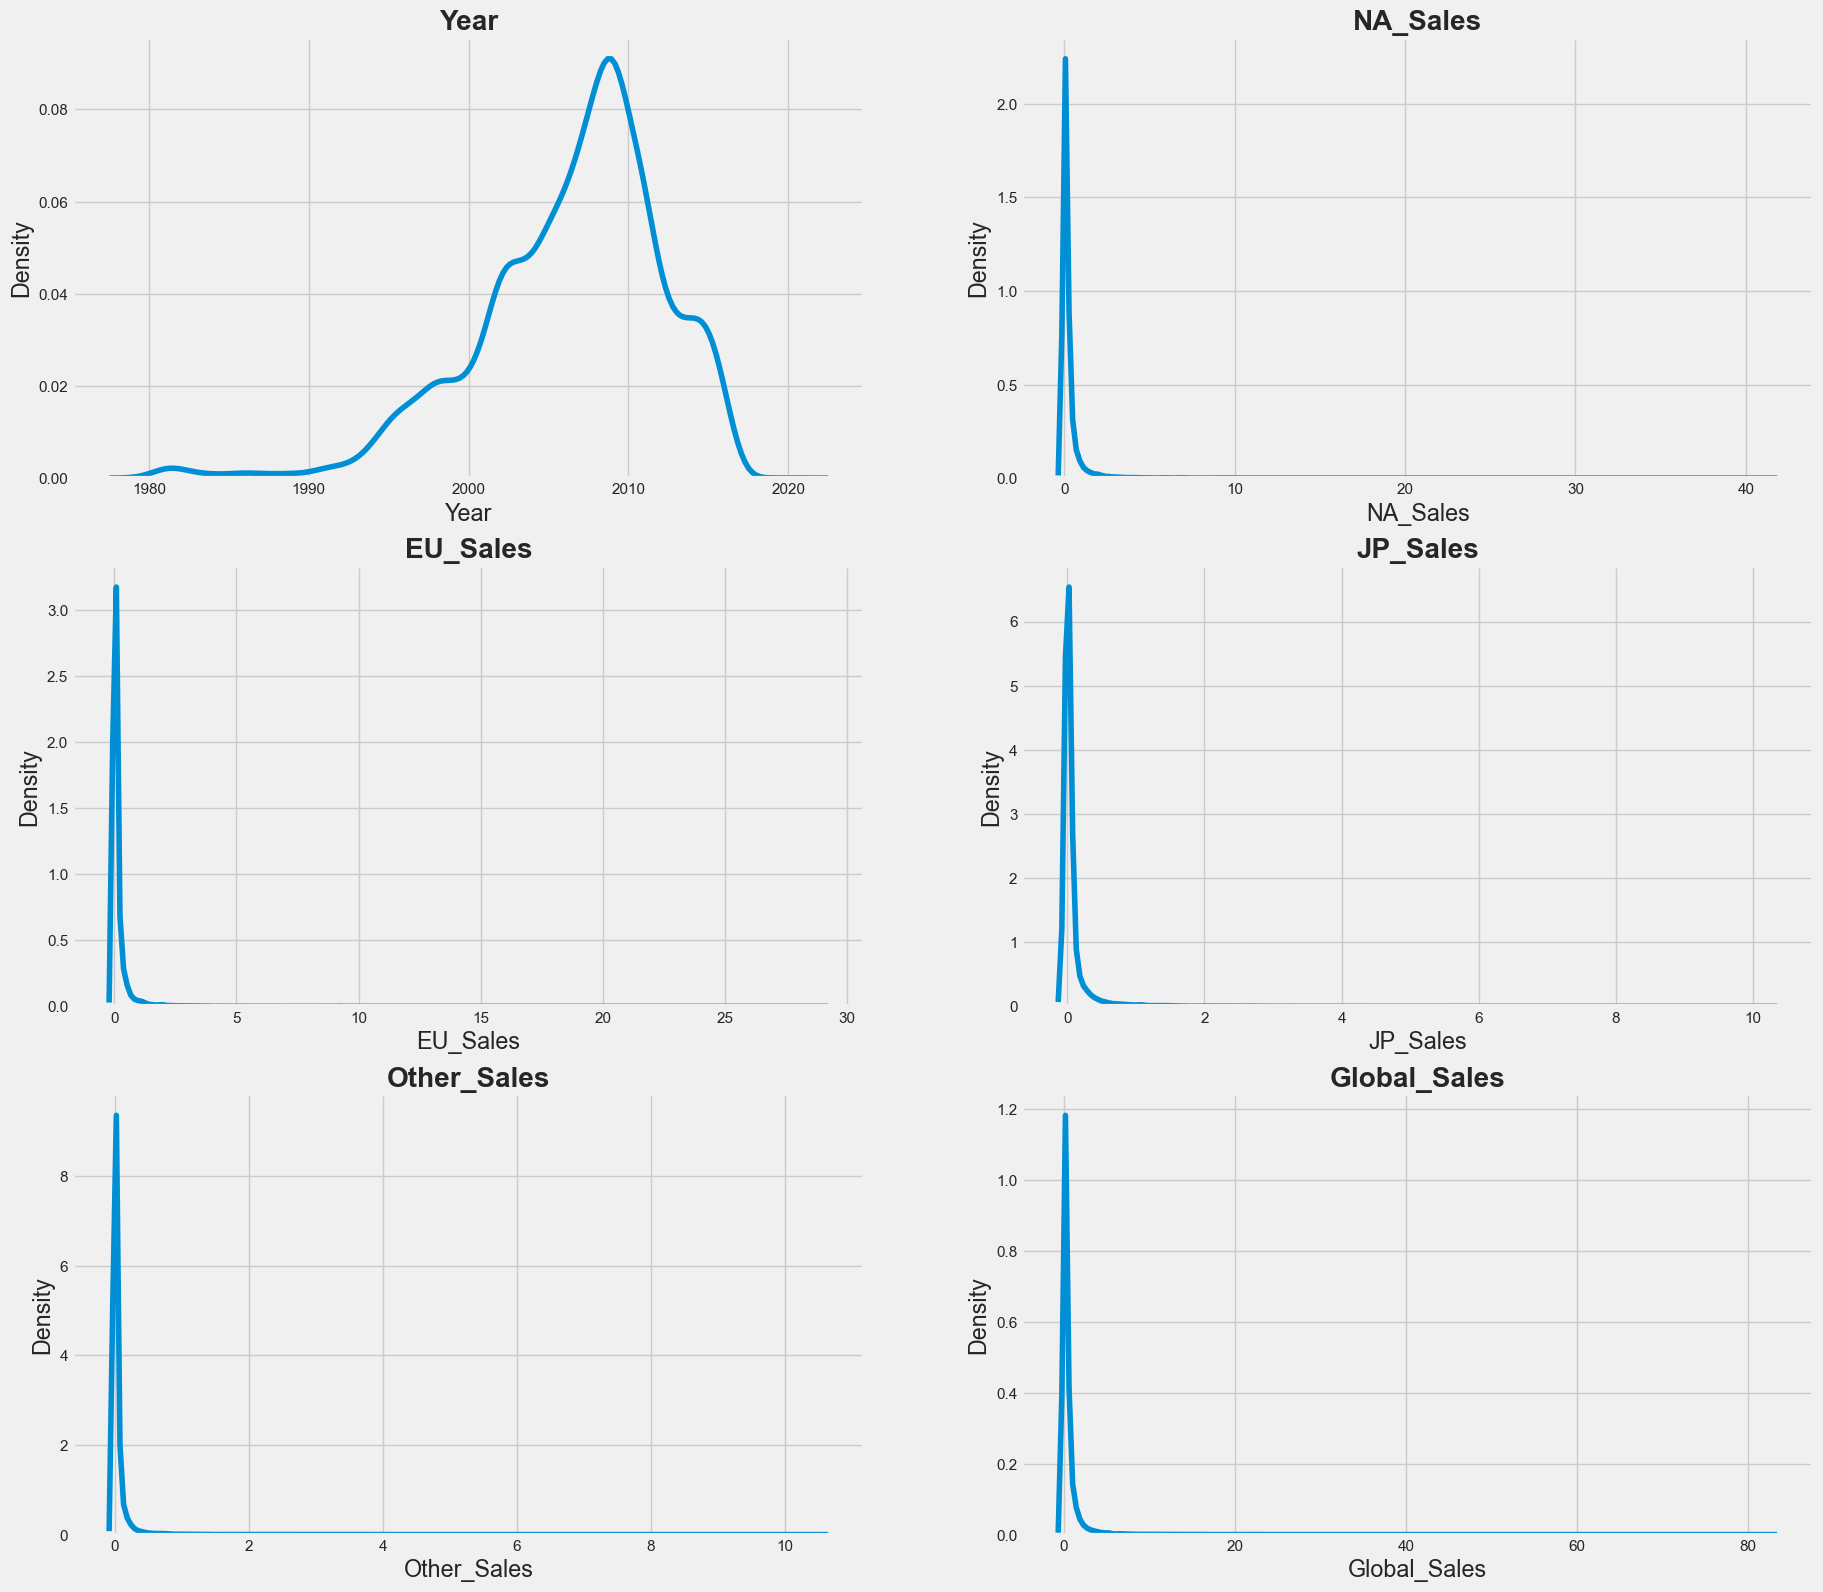

In [311]:
plt.figure(figsize=(20,25))       # Checking distribution
for i in enumerate(num_columns):
    plt.subplot(4,2,i[0]+1)
    sns.kdeplot(data=df,x=i[1])
    plt.title("{}".format(i[1]),fontweight="bold")

# THANK YOU